<a href="https://colab.research.google.com/github/intimanjunath/latest-AI-Engineer-tools/blob/main/deepseek_Janus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries (if not already installed)
!pip install gradio_client Pillow requests matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Import libraries
from gradio_client import Client, handle_file
from PIL import Image
import matplotlib.pyplot as plt
import io

# For file upload in Colab
from google.colab import files

In [ ]:
# Replace with your Hugging Face token
HF_TOKEN = ""

# Initialize the Janus Pro client (DeepSeek Janus Pro 7B)
janus_client = Client("deepseek-ai/Janus-Pro-7B", hf_token=HF_TOKEN)

Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔


In [ ]:
#Functions for Image Processing

In [ ]:
def load_local_image(path):
    """Loads an image from a given local file path."""
    return Image.open(path)

def ask_about_image(image_file, query_text):
    """
    Uses the Janus multimodal understanding endpoint to answer a question about the image.

    Parameters:
      image_file (str): Local file path to the image.
      query_text (str): A natural language question about the image.

    Returns:
      str: The answer provided by the model.
    """
    try:
        result = janus_client.predict(
            handle_file(image_file),
            query_text,
            api_name="/multimodal_understanding"
        )
        return result
    except Exception as error:
        return f"Error during image analysis: {error}"

def generate_image_from_text(prompt_text):
    """
    Uses the Janus text-to-image generation endpoint to create an image from a text prompt.

    Parameters:
      prompt_text (str): A creative description to generate the image.

    Returns:
      list: A list of PIL Image objects generated from the prompt.
    """
    generated_images = []
    try:
        # Request image generation
        result = janus_client.predict(prompt_text, api_name="/generate_image")
        # Expecting result to be a list of dictionaries, each with an 'image' key
        if isinstance(result, list):
            for item in result:
                if isinstance(item, dict) and 'image' in item:
                    try:
                        # Open and append the generated image
                        img = Image.open(item['image'])
                        generated_images.append(img)
                    except Exception as e:
                        print(f"Warning: Unable to load one of the images: {e}")
        else:
            print("Unexpected format returned from image generation endpoint.")
    except Exception as error:
        print(f"Error during image generation: {error}")
    return generated_images

In [ ]:
#Test the Janus Functions

In [ ]:
## --- Part A: Image Understanding ---

Upload an image file for analysis:


Saving modeling-portfolios-7-essential-photos-every-model-needs-2379480color1-7d93f27fd1e84e519af10512987a17a0.png.webp to modeling-portfolios-7-essential-photos-every-model-needs-2379480color1-7d93f27fd1e84e519af10512987a17a0.png (2).webp
Uploaded file: modeling-portfolios-7-essential-photos-every-model-needs-2379480color1-7d93f27fd1e84e519af10512987a17a0.png (2).webp


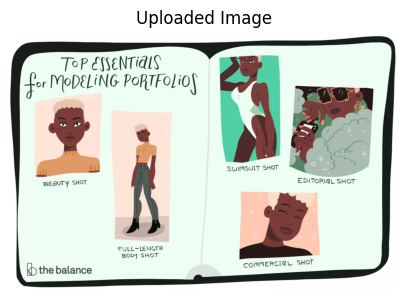


Question: Describe this image in detail.
Response from DeepSeek Janus: This image is an illustration that provides information on "Top Essentials for Modeling Portfolios." It is presented in a book-like format with two pages shown.

**Page 1:**
- The title "Top Essentials for Modeling Portfolios" is written at the top.
- There are three types of shots listed:
  1. **Beauty Shot**: A headshot of a person with short, light-colored hair, wearing an orange top and black pants.
  2. **Full-Length Body Shot**: A full-body shot of a person with short, light-colored hair, wearing a yellow top and gray pants.
  3. **Commercial Shot**: A headshot of a person with short, dark-colored hair, wearing a black top.

**Page 2:**
- There are three more types of shots listed:
  1. **Swimsuit Shot**: A full-body shot of a person in a white swimsuit, standing with one hand on their head.
  2. **Editorial Shot**: A group of people in swimsuits, with one person holding a surfboard, and another person holdin

In [ ]:
print("Upload an image file for analysis:")
uploaded_files = files.upload()

# Get the first uploaded file name
uploaded_filename = list(uploaded_files.keys())[0]
print(f"Uploaded file: {uploaded_filename}")

# Load and display the uploaded image
input_image = load_local_image(uploaded_filename)
plt.figure(figsize=(5,5))
plt.imshow(input_image)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()

# Ask a question about the image
question_text = "Describe this image in detail."
print(f"\nQuestion: {question_text}")
analysis_result = ask_about_image(uploaded_filename, question_text)
print("Response from DeepSeek Janus:", analysis_result)

In [ ]:
#Part B: Text-to-Image Generation


Generating image from prompt:
Prompt: Envision a mystical island suspended high above an endless ocean of clouds. At its heart, an ancient crystalline palace glows with a soft inner light, its towers twisting like spirals of delicate glass. The landscape blends surreal nature with futuristic design: luminescent trees sway gently, waterfalls shimmer with iridescent hues, and ethereal creatures glide silently among the stars. Beneath a celestial sky painted with swirling nebulae and distant galaxies, every element of this enchanted realm whispers secrets of time and magic.


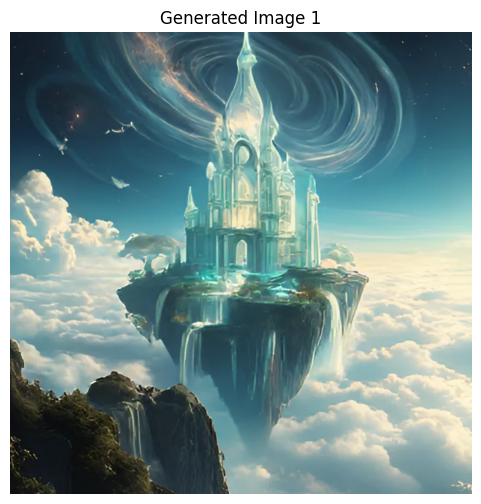

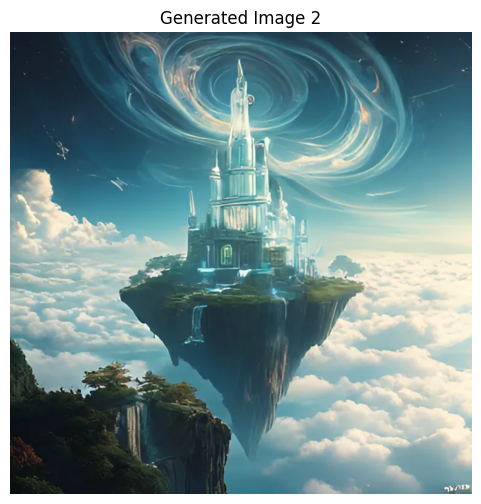

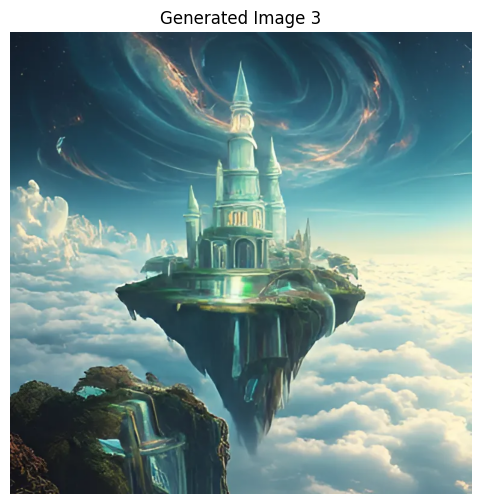

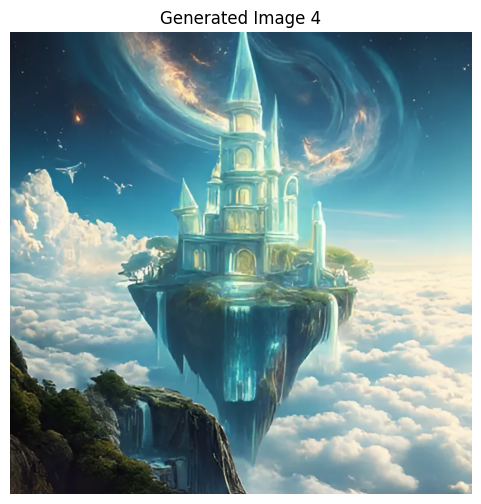

In [ ]:
# --- Part B: Text-to-Image Generation ---
creative_prompt = (
    "Envision a mystical island suspended high above an endless ocean of clouds. "
    "At its heart, an ancient crystalline palace glows with a soft inner light, its towers twisting like spirals of delicate glass. "
    "The landscape blends surreal nature with futuristic design: luminescent trees sway gently, waterfalls shimmer with iridescent hues, "
    "and ethereal creatures glide silently among the stars. Beneath a celestial sky painted with swirling nebulae and distant galaxies, "
    "every element of this enchanted realm whispers secrets of time and magic."
)
print("\nGenerating image from prompt:")
print("Prompt:", creative_prompt)

# Generate images from the prompt
images_list = generate_image_from_text(creative_prompt)
if images_list:
    for idx, gen_img in enumerate(images_list):
        plt.figure(figsize=(6,6))
        plt.imshow(gen_img)
        plt.title(f"Generated Image {idx+1}")
        plt.axis("off")
        plt.show()
else:
    print("No images were generated.")


Generating image from prompt:
Prompt: Imagine Monkey D. Luffy, the spirited pirate captain, standing boldly on the deck of his ship amid a swirling storm. His signature straw hat and red vest are vividly rendered in a dynamic, high-energy anime style. The roaring ocean and dramatic skies behind him reflect both the fierce determination in his eyes and the untamed spirit of adventure. Every detail, from the texture of his clothes to the wind tousling his hair, celebrates the essence of this legendary character.


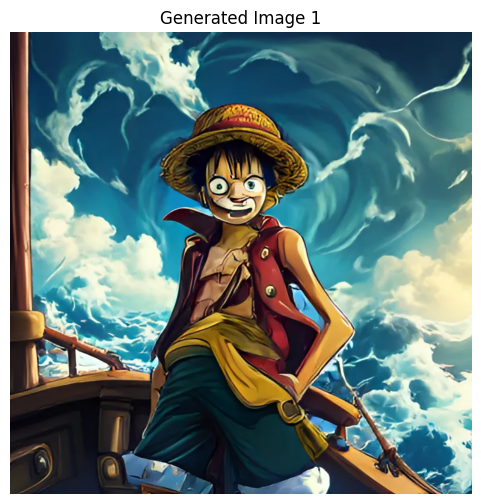

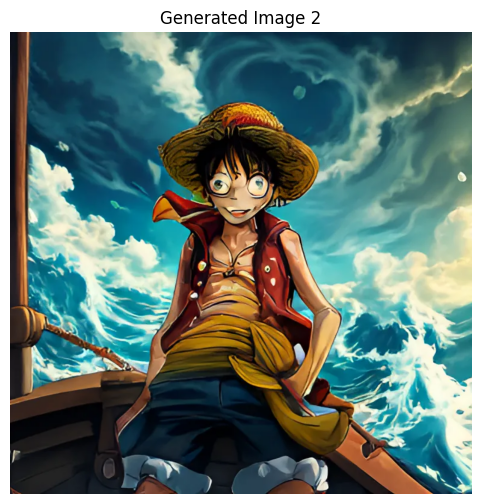

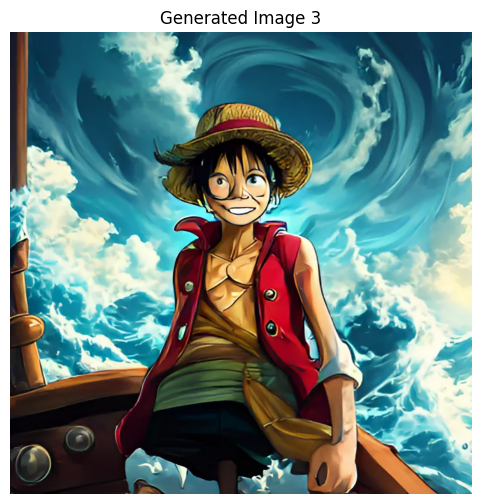

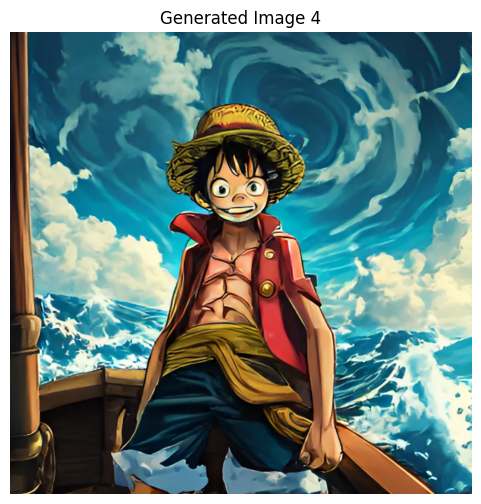

In [ ]:
# --- Part B: Text-to-Image Generation ---
creative_prompt = (
    "Imagine Monkey D. Luffy, the spirited pirate captain, standing boldly on the deck of his ship amid a swirling storm. "
    "His signature straw hat and red vest are vividly rendered in a dynamic, high-energy anime style. "
    "The roaring ocean and dramatic skies behind him reflect both the fierce determination in his eyes and the untamed spirit of adventure. "
    "Every detail, from the texture of his clothes to the wind tousling his hair, celebrates the essence of this legendary character."
)
print("\nGenerating image from prompt:")
print("Prompt:", creative_prompt)

# Generate images from the prompt
images_list = generate_image_from_text(creative_prompt)
if images_list:
    for idx, gen_img in enumerate(images_list):
        plt.figure(figsize=(6,6))
        plt.imshow(gen_img)
        plt.title(f"Generated Image {idx+1}")
        plt.axis("off")
        plt.show()
else:
    print("No images were generated.")